In [19]:
import yfinance as yf

# Define the ticker symbol and date range
ticker_symbol = "AAPL"
start_date = "2020-01-01"
end_date = "2021-12-31"

In [23]:
# Download the data
data = yf.download(ticker_symbol, start=start_date, end=end_date)
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,72.876114,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.167603,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.742668,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.400536,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.565201,132079200
...,...,...,...,...,...,...
2021-12-23,175.850006,176.850006,175.270004,176.279999,173.629761,68356600
2021-12-27,177.089996,180.419998,177.070007,180.330002,177.618866,74919600
2021-12-28,180.160004,181.330002,178.529999,179.289993,176.594498,79144300


In [25]:
# Save the data to a CSV file
data.to_csv("R:/Python Projects/AAPL.csv")

In [27]:
import pandas as pd
import numpy as np

In [31]:
# Load the data from the CSV file
data = pd.read_csv("R:/Python Projects/AAPL.csv", index_col="Date", parse_dates=True)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,72.876114,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.167603,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.742668,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.400536,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.565201,132079200
...,...,...,...,...,...,...
2021-12-23,175.850006,176.850006,175.270004,176.279999,173.629761,68356600
2021-12-27,177.089996,180.419998,177.070007,180.330002,177.618866,74919600
2021-12-28,180.160004,181.330002,178.529999,179.289993,176.594498,79144300


In [35]:
# Forward fill missing values
data = data.ffill()
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,72.876114,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.167603,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.742668,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.400536,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.565201,132079200
...,...,...,...,...,...,...
2021-12-23,175.850006,176.850006,175.270004,176.279999,173.629761,68356600
2021-12-27,177.089996,180.419998,177.070007,180.330002,177.618866,74919600
2021-12-28,180.160004,181.330002,178.529999,179.289993,176.594498,79144300


In [37]:
# Normalize the data
data = (data - data.mean()) / data.std()

In [79]:
# Define the function to calculate RSI
def calculate_rsi(data, window=14):
    delta = data.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

In [77]:
# Define the function to calculate Bollinger Bands
def calculate_bollinger_bands(data, window=20, num_std_dev=2):
    rolling_mean = data.rolling(window=window).mean()
    rolling_std = data.rolling(window=window).std()
    upper_band = rolling_mean + (rolling_std * num_std_dev)
    lower_band = rolling_mean - (rolling_std * num_std_dev)
    return upper_band, lower_band

In [69]:
# Create technical indicators
data["SMA_50"] = data["Close"].rolling(window=50).mean()
data["SMA_200"] = data["Close"].rolling(window=200).mean()
data["RSI"] = calculate_rsi(data["Close"], window=14)
data["Bollinger_Upper"], data["Bollinger_Lower"] = calculate_bollinger_bands(data["Close"], window=20, num_std_dev=2)

In [81]:
# Drop rows with missing values
data = data.dropna()
data

,Open,High,Low,Close,Adj Close,Volume,SMA_50,SMA_200,RSI,Bollinger_Upper,Bollinger_Lower
Date,,,,,,,,,,,
2020-10-15,0.027912,0.063028,0.055594,0.092163,0.080821,-0.184781,-0.036869,-1.002124,63.102261,0.213390,-0.434866
2020-10-16,0.115099,0.074894,0.078217,0.034581,0.024162,-0.139902,-0.033382,-0.994639,56.510575,0.213953,-0.393929
2020-10-19,0.070143,0.036583,-0.029754,-0.068999,-0.077753,-0.056853,-0.030065,-0.987548,52.833593,0.211994,-0.371868
2020-10-20,-0.057912,-0.012238,-0.030783,-0.016868,-0.026460,0.003064,-0.026806,-0.980298,52.563335,0.216206,-0.356658
2020-10-21,-0.041905,-0.021392,-0.002676,-0.038675,-0.047916,-0.542807,-0.021698,-0.973096,50.121880,0.195505,-0.302736
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,1.973602,1.949764,2.013471,1.985567,1.990510,-0.884623,1.392217,0.836618,66.108880,2.225372,1.337371
2021-12-27,2.015832,2.070799,2.075168,2.123561,2.127359,-0.780713,1.417137,0.846721,66.534473,2.234522,1.408359
2021-12-28,2.120388,2.101652,2.125212,2.088125,2.092218,-0.713825,1.440613,0.856142,59.995065,2.241696,1.466093


In [85]:
# Select relevant features
features = ["SMA_50", "SMA_200", "RSI", "Bollinger_Upper", "Bollinger_Lower"]

In [87]:
# Create lagged features
for feature in features:
    for lag in range(1, 6):
        data[f"{feature}_lag_{lag}"] = data[feature].shift(lag)

In [89]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

In [91]:
# Define the target variable
data["Target"] = np.where(data["Close"].shift(-1) > data["Close"], 1, 0)

In [93]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[features], data["Target"], test_size=0.2, random_state=42)

In [95]:
# Define the model
model = RandomForestClassifier(random_state=42)

In [97]:
# Define the hyperparameters to optimize
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

In [99]:
# Optimize the hyperparameters using grid search
grid_search = GridSearchCV(model, param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [103]:
# Get the best model
best_model = grid_search.best_estimator_

In [105]:
import matplotlib.pyplot as plt

In [107]:
# Make predictions on the testing set
y_pred = best_model.predict(X_test)

In [113]:
# Align the index of y_pred with the index of data
y_pred = pd.Series(y_pred, index=X_test.index)

# Calculate the strategy returns on the same subset of data as y_pred
strategy_returns = np.where(y_pred == 1, data.loc[y_pred.index, "Close"].pct_change(), 0)
data.loc[y_pred.index, "Strategy_Returns"] = strategy_returns
data["Cumulative_Returns"] = (1 + data["Strategy_Returns"]).cumprod()

In [121]:
# Calculate the benchmark returns
data["Benchmark_Returns"] = data["Close"].pct_change()
data["Cumulative_Benchmark_Returns"] = (1 + data["Benchmark_Returns"]).cumprod()

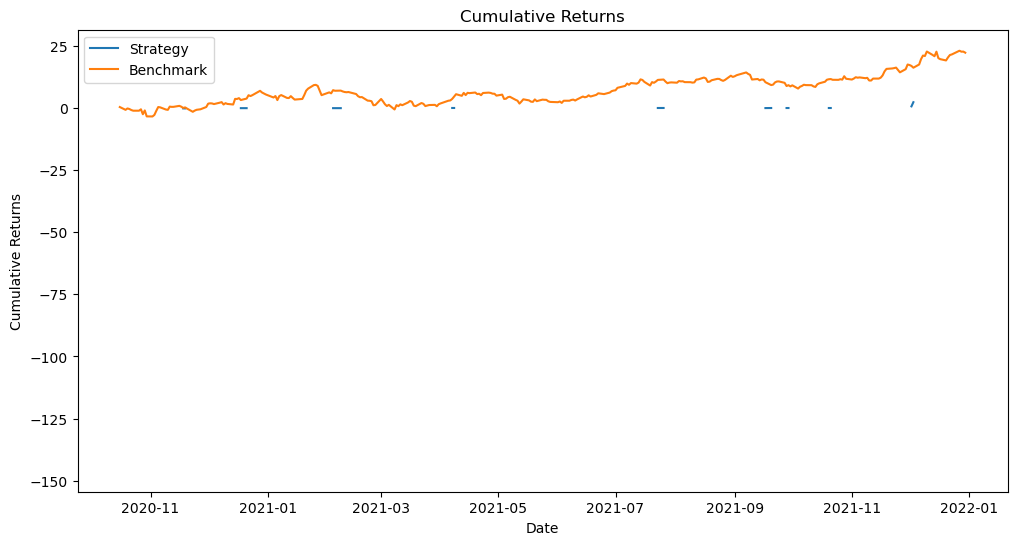

In [133]:
# Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(data["Cumulative_Returns"], label="Strategy")
plt.plot(data["Cumulative_Benchmark_Returns"], label="Benchmark")
plt.legend()
plt.title("Cumulative Returns")
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.show()